In [1]:
from Networks.MLP_Dict import MLP_Dict
from Saving.saveFile import get_next_model_filename
from Trainers import split_data,Trainer
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import joblib

In [2]:
# 初始化模型
input_shape = (2,)  # 输入形状
output_shape = (16384, )

model = MLP_Dict(input_shape, output_shape, hidden_layers=[16, 32, 64, 128], activation_function="tanh", output_keys=["u"])

# # 打印模型结构
# print(model)

In [5]:
input_np = joblib.load('preData/uni/input_all.joblib').astype(np.float32)
w_train_np = joblib.load('preData/uni/w_train.joblib').astype(np.float32)

input_train = torch.from_numpy(input_np).unsqueeze(1)
w_train = torch.from_numpy(w_train_np).view(20,-1).unsqueeze(1)

w_train.shape

targets_train = {"u": w_train}


In [6]:
# 定义损失函数和优化器
criterions = {
    "u": nn.MSELoss(),  # 针对 u 的损失函数
}
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
# 导入数据
train_loader, val_loader = split_data(input_train, targets_train, batch_size=1024)
trainer = Trainer(model, optimizer, criterions, device="cuda")

In [8]:
# 训练
save_path = get_next_model_filename(prefix='MLP')
trainer.fit(train_loader, val_loader, num_epochs=100000, early_stop_patience=100, save_path=save_path)

Training:   0%|          | 0/100000 [00:00<?, ?it/s]

Epoch 1/100000 | Train Loss: 0.5344 | Val Loss: 0.0650
Epoch 2/100000 | Train Loss: 0.5233 | Val Loss: 0.0616
Epoch 3/100000 | Train Loss: 0.5138 | Val Loss: 0.0586
Epoch 4/100000 | Train Loss: 0.5042 | Val Loss: 0.0558
Epoch 5/100000 | Train Loss: 0.4935 | Val Loss: 0.0530
Epoch 6/100000 | Train Loss: 0.4814 | Val Loss: 0.0501
Epoch 7/100000 | Train Loss: 0.4678 | Val Loss: 0.0473
Epoch 8/100000 | Train Loss: 0.4526 | Val Loss: 0.0446
Epoch 9/100000 | Train Loss: 0.4361 | Val Loss: 0.0423
Epoch 10/100000 | Train Loss: 0.4184 | Val Loss: 0.0403
Epoch 11/100000 | Train Loss: 0.3997 | Val Loss: 0.0389
Epoch 12/100000 | Train Loss: 0.3804 | Val Loss: 0.0381
Epoch 13/100000 | Train Loss: 0.3607 | Val Loss: 0.0379
Epoch 14/100000 | Train Loss: 0.3409 | Val Loss: 0.0384
Epoch 15/100000 | Train Loss: 0.3213 | Val Loss: 0.0393
Epoch 16/100000 | Train Loss: 0.3024 | Val Loss: 0.0405
Epoch 17/100000 | Train Loss: 0.2842 | Val Loss: 0.0415
Epoch 18/100000 | Train Loss: 0.2670 | Val Loss: 0.0421
E

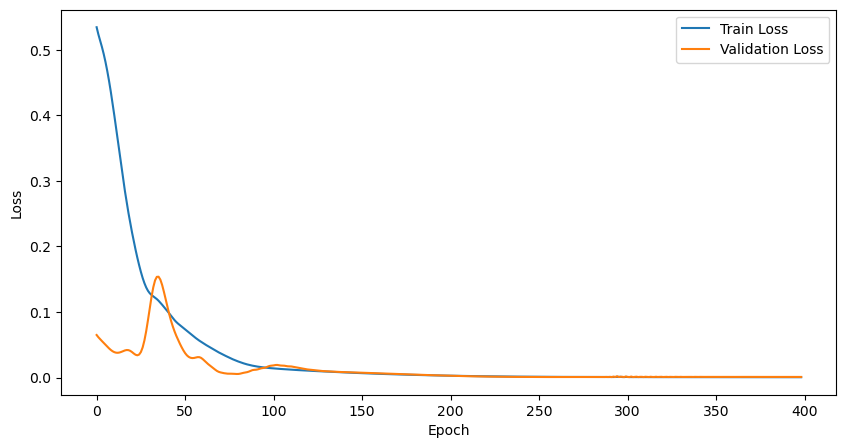

In [9]:
trainer.plot_loss()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
save_path = get_next_model_filename(prefix='PIRN_nonuni')
trainer.fit(train_loader, val_loader, num_epochs=100000, early_stop_patience=1000, save_path=save_path)

In [ ]:
trainer.plot_loss()